#### Mushroom dataset fitted with random forest and other ensemble methods 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from scipy import stats
# Cause plots to be displayed in the notebook:
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE

### Read Data

  Attribute Information: (classes: edible=e, poisonous=p)
  
     1. cap-shape:                bell=b,conical=c,convex=x,flat=f,
                                  knobbed=k,sunken=s
     2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
     3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r,
                                  pink=p,purple=u,red=e,white=w,yellow=y
     4. bruises?:                 bruises=t,no=f
     5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f,
                                  musty=m,none=n,pungent=p,spicy=s
     6. gill-attachment:          attached=a,descending=d,free=f,notched=n
     7. gill-spacing:             close=c,crowded=w,distant=d
     8. gill-size:                broad=b,narrow=n
     9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g,
                                  green=r,orange=o,pink=p,purple=u,red=e,
                                  white=w,yellow=y
    10. stalk-shape:              enlarging=e,tapering=t
    11. stalk-root:               bulbous=b,club=c,cup=u,equal=e,
                                  rhizomorphs=z,rooted=r,missing=?
    12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
    13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
    14. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    15. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    16. veil-type:                partial=p,universal=u
    17. veil-color:               brown=n,orange=o,white=w,yellow=y
    18. ring-number:              none=n,one=o,two=t
    19. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l,
                                  none=n,pendant=p,sheathing=s,zone=z
    20. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r,
                                  orange=o,purple=u,white=w,yellow=y
    21. population:               abundant=a,clustered=c,numerous=n,
                                  scattered=s,several=v,solitary=y
    22. habitat:                  grasses=g,leaves=l,meadows=m,paths=p,
                                  urban=u,waste=w,woods=d


In [5]:
df=pd.read_csv('../mushroom_UCI_data/agaricus-lepiota.data')

### EDA and some vizies 

In [6]:
df.describe()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
count,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,...,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3655,3244,2283,4748,3528,7913,6811,5612,1728,...,4935,4463,4383,8123,7923,7487,3967,2388,4040,3148


In [7]:
columns=['class','cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor','gill_attachment',          
'gill_spacing','gill_size','gill_color','stalk_shape','stalk_root','stalk_surface_above_ring' ,'stalk_surface_below_ring', 
'stalk_color_above_ring','stalk_color_below_ring' ,'veil_type','veil_color','ring_number','ring_type','spore_print_color',
'population','habitat']

In [8]:
df.columns=columns

In [9]:
df.head()

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [10]:
# Using LabelEncoder to convert catergory values to nominal 
from sklearn.preprocessing import LabelEncoder
df_encoded=df.copy()
labelencoder=LabelEncoder()
for column in df.columns:
    df_encoded[column] = labelencoder.fit_transform(df_encoded[column])

df_encoded.head()

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
1,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
2,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
3,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
4,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1


In [11]:
# predict test class:
X=df_encoded.drop(['class','veil_type'],axis=1).values
y=df_encoded['class'].values  # 1 is for poisonous 
xcols=df_encoded.drop(['class','veil_type'],axis=1).columns
xcols

Index(['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_color', 'ring_number', 'ring_type',
       'spore_print_color', 'population', 'habitat'],
      dtype='object')

In [28]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Choose a model or models
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42, max_depth=6)

# Fit model

clf.fit(X_train, y_train)


# Evaluate model against training set

 # Make predictions on the testing data
y_pred0 = clf.predict(X_train)
 # Evaluate the model's accuracy
print("Accuracy:", accuracy_score(y_train, y_pred0))
 # Print the confusion matrix
print("Confusion matrix:")
print(confusion_matrix(y_train, y_pred0))
print(classification_report(y_train, y_pred0))

# Evaluate model against test set

 # Make predictions on the testing data
y_pred = clf.predict(X_test)
 # Evaluate the model's accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
 # Print the confusion matrix
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9936903662665435
Confusion matrix:
[[3355    0]
 [  41 3102]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3355
           1       1.00      0.99      0.99      3143

    accuracy                           0.99      6498
   macro avg       0.99      0.99      0.99      6498
weighted avg       0.99      0.99      0.99      6498

Accuracy: 0.9938461538461538
Confusion matrix:
[[853   0]
 [ 10 762]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       853
           1       1.00      0.99      0.99       772

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



In [29]:
n_estimators=100  # default 100
max_depths=[clf[i].tree_.max_depth  for  i in range(n_estimators)]
num_nodes=[clf[i].tree_.node_count  for  i in range(n_estimators)]
num_leaves=[clf[i].tree_.n_leaves  for  i in range(n_estimators)]
# print("Depths of the random forest:", max_depths)
# print("Number of nodes in each decision tree:", num_nodes)
# print("Number of Leaves:", num_leaves)

print("min,max       Depths of any tree :", min(max_depths), max(max_depths) )
print("min,max,mean  Number of nodes in each decision tree:", min(num_nodes), max(num_nodes), np.mean(num_nodes))
print("min,max,mean  Number of Leaves:", min(num_leaves), max(num_leaves), np.mean(num_leaves))

min,max       Depths of any tree : 6 6
min,max,mean  Number of nodes in each decision tree: 15 59 34.12
min,max,mean  Number of Leaves: 8 30 17.56


In [30]:
# these are attributes for the random forest 
print(clf.base_estimator_)
print(clf.feature_importances_)
# print(clf.estimators_) this outputs all the trees that were attempted

DecisionTreeClassifier()
[0.0021405  0.0067995  0.01064553 0.04709592 0.1902513  0.00128604
 0.03801057 0.12973059 0.12741415 0.01740533 0.05910384 0.04507879
 0.0335764  0.01826433 0.02148557 0.00216022 0.01143203 0.07515223
 0.08791638 0.05577981 0.01927096]


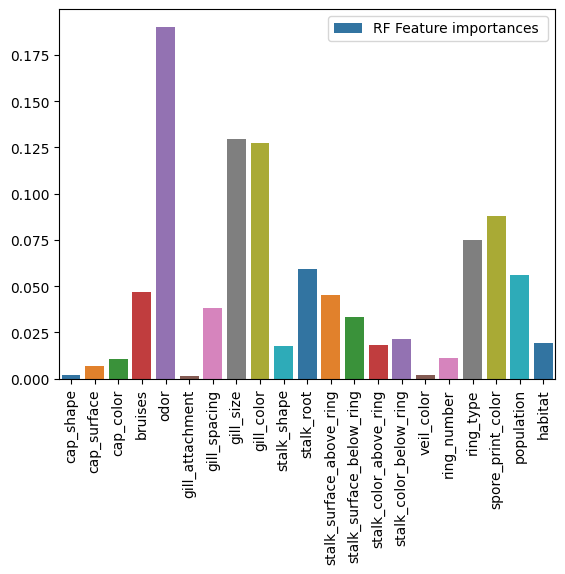

In [31]:
ax=sns.barplot(x=xcols, y=clf.feature_importances_,palette='tab10',label='RF Feature importances ') 
ax=plt.xticks(rotation=90)
ax=plt.legend()

In [32]:

sfm = SelectFromModel(clf, prefit=True)
print(xcols[sfm.get_support()])

Index(['odor', 'gill_size', 'gill_color', 'stalk_root', 'ring_type',
       'spore_print_color', 'population'],
      dtype='object')


In [33]:
rfe = RFE(estimator=clf, n_features_to_select=3, step=1)
rfe.fit(X_train,y_train)
rfe.support_
print(rfe.score(X_test,y_test))
xcols[rfe.support_]

0.9950769230769231


Index(['odor', 'gill_color', 'spore_print_color'], dtype='object')